
# Khipus.ai  
## Unsupervised Learning  
### Clustering Algorithms  
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>  

### Assignment 4  
### Name: (Please Enter Your Name Before Submitting)  



## Assignment Instructions

In this assignment, you will perform a clustering analysis on country locations using latitude and longitude data.  
You will follow these steps:

1. **Import the relevant libraries.**  
2. **Load the dataset (`countries.csv`).**  
3. **Visualize the data by plotting longitude vs. latitude.**  
4. **Select the features for clustering.**  
5. **Perform clustering analysis and Evaluate clustering results.**  
6. **Explore clustering solutions and select the number of clusters** 

Ensure that you document your analysis and interpretations in Markdown cells.  


1. Import the relevant libraries.

In [13]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


2. Load the dataset (countries.csv).

In [14]:

# Load the dataset

# your code here

file_path = "countries.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,ountry,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


4. Visualize the data by plotting longitude vs. latitude.

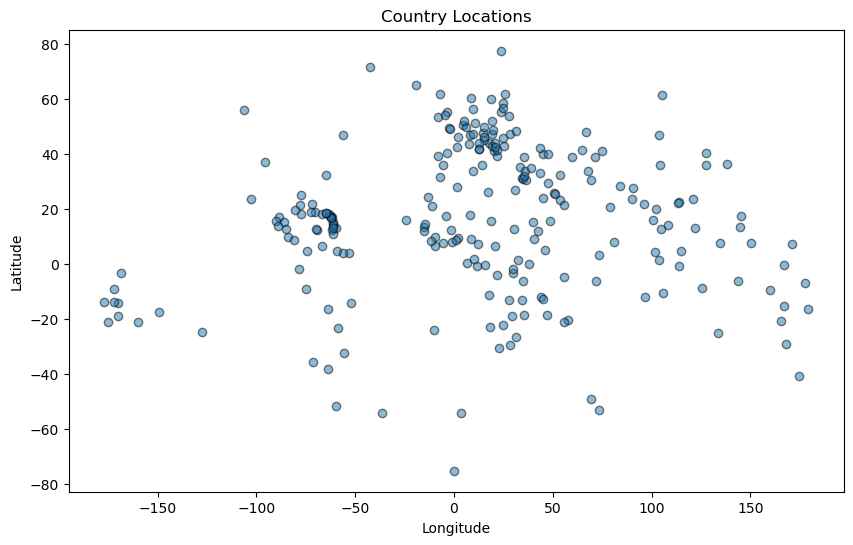

In [15]:

# Scatter plot of country locations (Longitude vs Latitude)

# your code here
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Country Locations')
plt.show()


4. Select the features for clustering.

In [16]:

# Selecting features for clustering
X = df[['longitude', 'latitude']]


Standardize the features for clustering and Drop rows with missing values

In [17]:

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Drop rows with missing values
X_scaled = X_scaled[~np.isnan(X_scaled).any(axis=1)]


5.Perform clustering analysis using the Elbow method to find the optimal number of clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: 

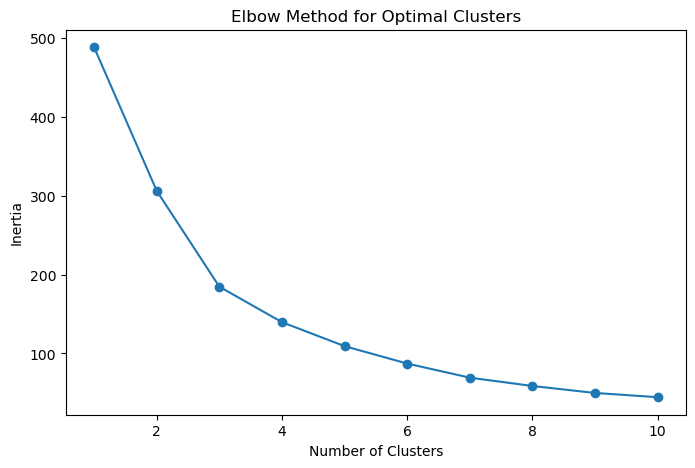

In [18]:


# Using the Elbow method to find the optimal number of clusters

# your code here
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


6.Explore clustering solutions and select the number of clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanikj\AppData\Local\Temp\ipykernel_37716\1169140957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)


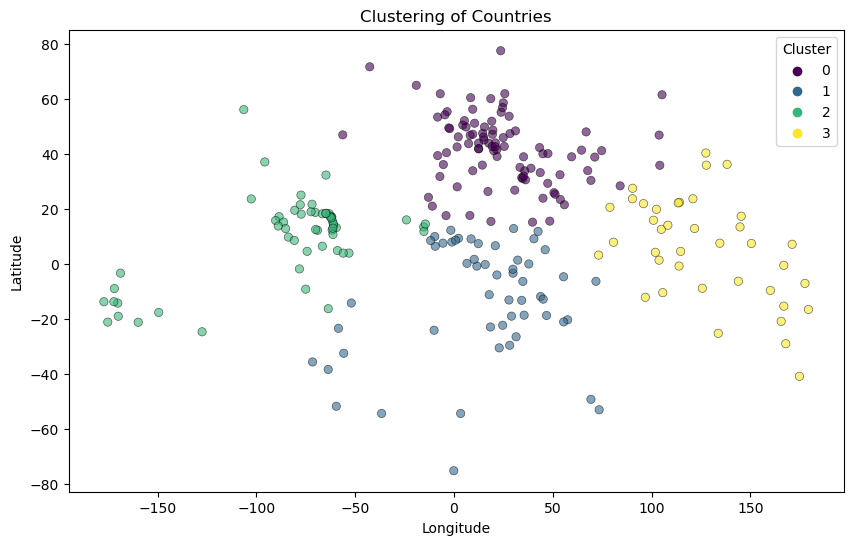

In [19]:
# Drop rows with missing values in the original DataFrame
df_cleaned = df.dropna(subset=['longitude', 'latitude'])

# Selecting the optimal number of clusters based on the Elbow method

# your code here
optimal_clusters = 4  # Adjust based on the elbow plot

# Performing clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['latitude'], hue=df_cleaned['cluster'], palette='viridis', alpha=0.6, edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Countries')
plt.legend(title="Cluster")
plt.show()
